# Решение нелинейных уравнений

Подмодуль [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) также содержит в себе методы для поиска корней нелинейных уравнений и их систем.

In [1]:
from matplotlib import pyplot as plt


def configure_matplotlib():
    plt.rc('text', usetex=True)
    plt.rcParams["axes.titlesize"] = 28
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 24
    plt.rcParams["xtick.labelsize"] = plt.rcParams["ytick.labelsize"] = 18
    plt.rcParams["text.latex.preamble"] = r"""
    \usepackage[utf8]{inputenc}
    \usepackage[english,russian]{babel}
    \usepackage{amsmath}
    """

configure_matplotlib()

## Поиск корня скалярной функции одного аргумента

Функция [scipy.optimize.root_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar) позволяет искать корни функции $f\colon \mathbb{R} \to \mathbb{R}$:

$$
f(x) = 0.
$$

Функция `root_scalar` предоставляет доступ к разным методам поиска корней, таким как `newton`, `bisect`, `secant` и многим другим. Какие-то из этих методов ищут корень внутри отрезка `bracket`, а другие ищут корень, начиная с какого-то начального приближения `x0`. 

      converged: True
           flag: 'converged'
 function_calls: 46
     iterations: 44
           root: 1.0000000000002274


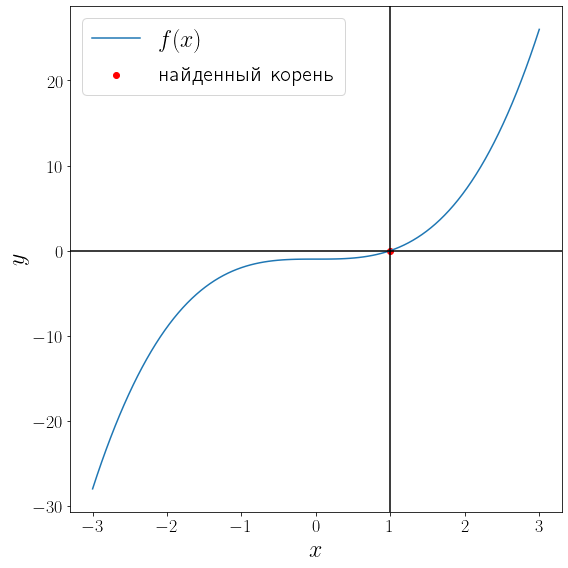

In [5]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x):
    return x**3 - 1

solution = optimize.root_scalar(f, bracket=[-10, 10], method="bisect")
print(solution)

x = np.linspace(-3, 3, 100)


fig, ax = plt.subplots(figsize=(8, 8), layout="tight")
ax.plot(x, f(x), label="$f(x)$")
ax.scatter(solution.root, f(solution.root) , color="red", label="найденный корень")
ax.axvline(solution.root, color="black")
ax.axhline(0, color="black")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

Метод бисекции сошелся за 44 итерации. Проверим метод Ньютона.

      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0


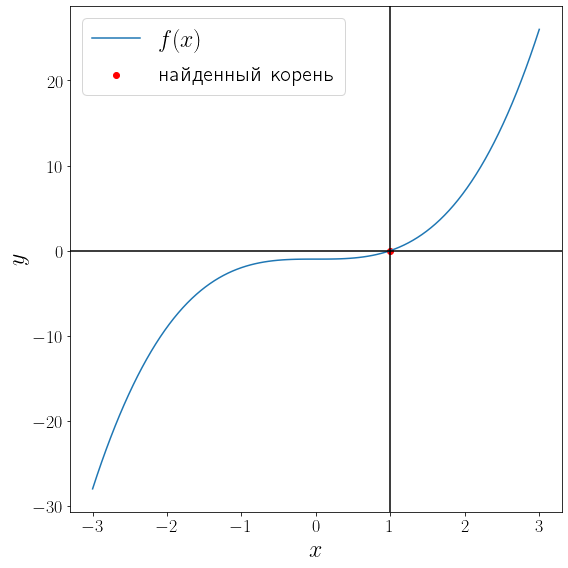

In [6]:
def fprime(x):
    return 3 * x**2

solution = optimize.root_scalar(f, fprime=fprime, x0=-2, method="newton")
print(solution)


fig, ax = plt.subplots(figsize=(8, 8), layout="tight")
ax.plot(x, f(x), label="$f(x)$")
ax.scatter(solution.root, f(solution.root) , color="red", label="найденный корень")
ax.axvline(solution.root, color="black")
ax.axhline(0, color="black")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

Метод Ньютона сошелся за 11 итераций.

## Решение системы нелинейных уравнений.

Функция [optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) предназначена для поиска корней уравнений вида

$$
F(x) = 0,
$$

где $x\in\mathbb{R}^n$ и $F\colon \mathbb{R}^n \to \mathbb{R}^n$ многомерны, т.е. `optimize.root` решает системы вида

$$
\begin{cases}
f_1(x_1, ..., x_n) = 0, \\
\cdots \\
f_n(x_1, ..., x_n) = 0.
\end{cases}
$$

Рассмотрим поиск корня на примере функции 

$$
\begin{cases}
x_1 + \frac{(x_1 - x_2)^3}{2} = 1, \\
\frac{(x_2 - x_1)^3}{2} + x_2 = 1.
\end{cases}
$$

Матрица Якоби этого уравнения имеет вид

$$
\begin{pmatrix}
1 + \frac{3}{2}(x_2 - x_1)^2 & \frac{3}{2}(x_2 - x_1)^2 \\
\frac{3}{2}(x_2 - x_1)^2 & 1 + \frac{3}{2}(x_2 - x_1)^2
\end{pmatrix},
$$

а единственный действительный корень которой

$$
\begin{cases}
x_1 = 1, \\
x_2 = 1.
\end{cases}
$$

В самом простом варианте достаточно передать методу `optimize.root` функцию левой части уравнения $F$ и начальное приближение к корню.  

In [7]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x):
    x = np.array(x)
    return np.array([
        x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
        0.5 * (x[1] - x[0])**3 + x[1] - 1.0
        ])

solution = optimize.root(f, x0 = [0, 0])  
print(solution)  

    fjac: array([[-1.00000000e+00, -1.09073861e-12],
       [ 1.09073861e-12, -1.00000000e+00]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([-2.18114415e-12, -2.18114415e-12])
       r: array([-1.00000000e+00, -2.18119967e-12, -1.00000000e+00])
  status: 1
 success: True
       x: array([1., 1.])


Если известно аналитическое выражение для производно, то лучше задействовать его и передать по параметру `jac`.

In [8]:
def jac(x):
    return np.array([
        [1 + 1.5 * (x[0] - x[1])**2, -1.5 * (x[0] - x[1])**2],
        [-1.5 * (x[1] - x[0])**2, 1 + 1.5 * (x[1] - x[0])**2]
        ])


solution = optimize.root(f, jac=jac, x0 = [0, 0], method="hybr")  
print(solution)  

    fjac: array([[-1.,  0.],
       [ 0., -1.]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 2
    njev: 1
     qtf: array([1., 1.])
       r: array([-1., -0., -1.])
  status: 1
 success: True
       x: array([1., 1.])
